In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.shape, test.shape

((45528, 19), (11383, 18))

In [4]:
test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              11383 non-null  object 
 1   name                     11383 non-null  object 
 2   age                      11383 non-null  int64  
 3   gender                   11383 non-null  object 
 4   owns_car                 11251 non-null  object 
 5   owns_house               11383 non-null  object 
 6   no_of_children           11193 non-null  float64
 7   net_yearly_income        11383 non-null  float64
 8   no_of_days_employed      11278 non-null  float64
 9   occupation_type          11383 non-null  object 
 10  total_family_members     11352 non-null  float64
 11  migrant_worker           11357 non-null  float64
 12  yearly_debt_payments     11361 non-null  float64
 13  credit_limit             11383 non-null  float64
 14  credit_limit_used(%)  

#### Null value handling

In [7]:
print(train.owns_car.value_counts())
print(train.no_of_children.value_counts())
print(train.total_family_members.value_counts())
print(train.migrant_worker.value_counts())

N    29743
Y    15238
Name: owns_car, dtype: int64
0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
8.0        1
7.0        1
9.0        1
Name: no_of_children, dtype: int64
2.0     23455
1.0      9913
3.0      7812
4.0      3623
5.0       564
6.0        57
7.0        12
8.0         6
10.0        2
9.0         1
Name: total_family_members, dtype: int64
0.0    37302
1.0     8139
Name: migrant_worker, dtype: int64


In [8]:
print(train["owns_car"].mode()[0], test["owns_car"].mode()[0])
print(train["no_of_children"].mode()[0], test["no_of_children"].mode()[0])
print(train["total_family_members"].mode()[0],test["total_family_members"].mode()[0])
print(train["migrant_worker"].mode()[0], test["migrant_worker"].mode()[0])

N N
0.0 0.0
2.0 2.0
0.0 0.0


In [9]:
#replace with mode
train["owns_car"].fillna(train["owns_car"].mode()[0], inplace=True)
test["owns_car"].fillna(test["owns_car"].mode()[0], inplace=True)

train["no_of_children"].fillna(train["no_of_children"].mode()[0], inplace=True)
test["no_of_children"].fillna(test["no_of_children"].mode()[0], inplace=True)

train["total_family_members"].fillna(train["total_family_members"].mode()[0], inplace=True)
test["total_family_members"].fillna(test["total_family_members"].mode()[0], inplace=True)

train["migrant_worker"].fillna(train["migrant_worker"].mode()[0], inplace=True)
test["migrant_worker"].fillna(test["migrant_worker"].mode()[0], inplace=True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 45528 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           45528 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45528 non-null  float64
 11  migrant_worker           45528 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              11383 non-null  object 
 1   name                     11383 non-null  object 
 2   age                      11383 non-null  int64  
 3   gender                   11383 non-null  object 
 4   owns_car                 11383 non-null  object 
 5   owns_house               11383 non-null  object 
 6   no_of_children           11383 non-null  float64
 7   net_yearly_income        11383 non-null  float64
 8   no_of_days_employed      11278 non-null  float64
 9   occupation_type          11383 non-null  object 
 10  total_family_members     11383 non-null  float64
 11  migrant_worker           11383 non-null  float64
 12  yearly_debt_payments     11361 non-null  float64
 13  credit_limit             11383 non-null  float64
 14  credit_limit_used(%)  

<AxesSubplot:xlabel='net_yearly_income'>

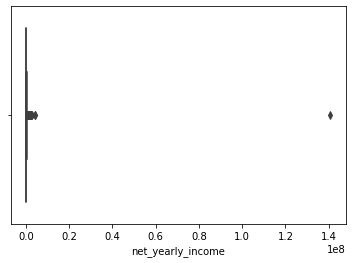

In [12]:
sns.boxplot(train.net_yearly_income)

<AxesSubplot:xlabel='no_of_days_employed', ylabel='no_of_days_employed'>

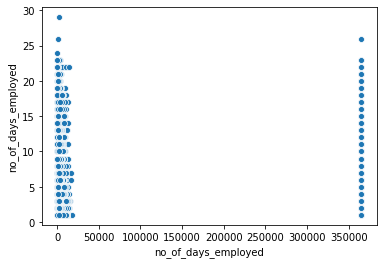

In [13]:
sns.scatterplot(data=train, x=train.no_of_days_employed, y=train.no_of_days_employed.value_counts())

<AxesSubplot:>

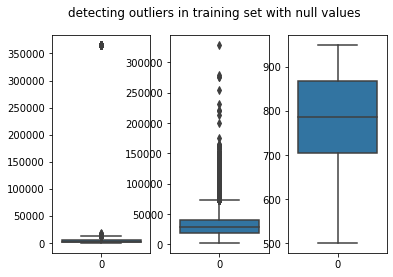

In [14]:
fig, axes = plt.subplots(1, 3)

fig.suptitle('detecting outliers in training set with null values')

sns.boxplot(ax=axes[0], data=train.no_of_days_employed)
sns.boxplot(ax=axes[1], data=train.yearly_debt_payments)
sns.boxplot(ax=axes[2], data=train.credit_score)

Since a lot of outliers are present in the dataset, I am not removing them. But I will find the mean of the rest of the data and replace it with the null values

In [15]:
df = pd.concat([train, test], axis=0)

<AxesSubplot:xlabel='yearly_debt_payments'>

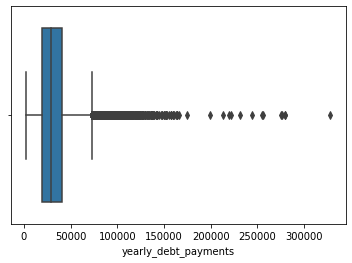

In [16]:
sns.boxplot(df.yearly_debt_payments)

In [17]:
print("Yearly debt payments null value handling")

print("Total null values in yearly debt payments in both train and test: ", df.yearly_debt_payments.isnull().sum())
print("Null value percent: ",(df.yearly_debt_payments.isnull().sum()*100)/len(df.yearly_debt_payments), "%")

print("\nOutliers detection using IQR")

Q1_ydp = df["yearly_debt_payments"].quantile(0.25)
Q3_ydp = df["yearly_debt_payments"].quantile(0.75)

print("First quantile: ",Q1_ydp)
print("3rd quantile: ",Q3_ydp)

IQR_ydp = Q3_ydp - Q1_ydp
print("IQR: ",IQR_ydp)
print("threshold: ", 1.5*IQR_ydp)

ydp_out = df[np.logical_or(df["yearly_debt_payments"] < (Q1_ydp - (1.5 * IQR_ydp)), df["yearly_debt_payments"] > (Q3_ydp + (1.5 * IQR_ydp)))]

print("Percentage of outliers: ", ((ydp_out.shape[0]/(df.shape[0]-df.yearly_debt_payments.isnull().sum()))*100), "%")

ydp_mean_replace = (df.yearly_debt_payments.sum() - ydp_out.yearly_debt_payments.sum()) / (len(df.yearly_debt_payments) - len(ydp_out.yearly_debt_payments))

print("\n")
print("Mean excluding outliers: ",ydp_mean_replace)
print("Mean including outliers: ",df["yearly_debt_payments"].mean())
print("difference: ", df["yearly_debt_payments"].mean()-ydp_mean_replace)

#replace with mean
train["yearly_debt_payments"].fillna(ydp_mean_replace, inplace=True)
test["yearly_debt_payments"].fillna(ydp_mean_replace, inplace=True)

Yearly debt payments null value handling
Total null values in yearly debt payments in both train and test:  117
Null value percent:  0.2055841577199487 %

Outliers detection using IQR
First quantile:  19293.0
3rd quantile:  40599.0525
IQR:  21306.052499999998
threshold:  31959.078749999997
Percentage of outliers:  2.392858400535268 %


Mean excluding outliers:  30383.314303355415
Mean including outliers:  31853.376781350144
difference:  1470.0624779947284


<AxesSubplot:>

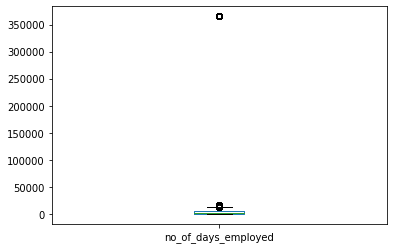

In [18]:
df.no_of_days_employed.plot(kind="box")

In [19]:
print("Number of days employed null value handling")

print("Total null values in yearly debt payments in both train and test: ", df.no_of_days_employed.isnull().sum())
print("Null value percent: ",(df.no_of_days_employed.isnull().sum()*100)/len(df.no_of_days_employed), "%")

print("\nOutliers detection using IQR")

Q1_nde = df["no_of_days_employed"].quantile(0.25)
Q3_nde = df["no_of_days_employed"].quantile(0.75)

print("First quantile: ",Q1_nde)
print("3rd quantile: ",Q3_nde)

IQR_nde = Q3_nde - Q1_nde
print("IQR: ",IQR_nde)
print("threshold: ", 1.5*IQR_nde)

nde_out = df[np.logical_or(df["no_of_days_employed"] < (Q1_nde - (1.5 * IQR_nde)), df["no_of_days_employed"] > (Q3_nde + (1.5 * IQR_nde)))]

print("Percentage of outliers: ", ((nde_out.shape[0]/(df.shape[0]-df.no_of_days_employed.isnull().sum()))*100), "%")

nde_mean_replace = (df.no_of_days_employed.sum() - ydp_out.no_of_days_employed.sum()) / (len(df.no_of_days_employed) - len(ydp_out.no_of_days_employed))

print("\n")
print("Mean excluding outliers: ",nde_mean_replace)
print("Mean including outliers: ",df["no_of_days_employed"].mean())
print("difference: ", df["no_of_days_employed"].mean()-nde_mean_replace)

#replace with mean
train["no_of_days_employed"].fillna(nde_mean_replace, inplace=True)
test["no_of_days_employed"].fillna(nde_mean_replace, inplace=True)

Number of days employed null value handling
Total null values in yearly debt payments in both train and test:  568
Null value percent:  0.9980495861959903 %

Outliers detection using IQR
First quantile:  936.0
3rd quantile:  5749.0
IQR:  4813.0
threshold:  7219.5
Percentage of outliers:  18.163747049322897 %


Mean excluding outliers:  67135.21212557604
Mean including outliers:  67191.04248975028
difference:  55.83036417423864


In [20]:
test[test.customer_id == 'CST_127568']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
8726,CST_127568,Richwine,27,F,N,N,2.0,203470.8,-3.0,Unknown,3.0,0.0,39276.77,41847.94,39,710.0,0,0


In [21]:
test.loc[8726, 'no_of_days_employed'] = df["no_of_days_employed"].mean()

In [22]:
test[test.customer_id == 'CST_127568']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
8726,CST_127568,Richwine,27,F,N,N,2.0,203470.8,67191.04249,Unknown,3.0,0.0,39276.77,41847.94,39,710.0,0,0


In [23]:
# since no outliers in credit score column  directly replace with mean
train["credit_score"].fillna(df["credit_score"].mean(), inplace=True)
test["credit_score"].fillna(df["credit_score"].mean(), inplace=True)

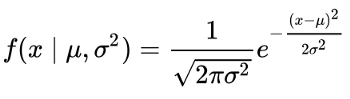
###### Probability density function(pdf) for a normal distribution
reference : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [24]:
# from scipy.integrate import quad
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # import numpy as np
# # import matplotlib.pyplot as plt
# # %matplotlib inline
# scaler = StandardScaler()
# minmax = MinMaxScaler()

# # x1 = df.yearly_debt_payments
# x = np.array(df['no_of_days_employed'])
# x = np.log(x)
# x = scaler.fit_transform(x.reshape(-1,1))
# # x = np.log(x)
# # x = minmax.fit_transform(x.reshape(-1,1))
# # x = np.log(x)
# # x = scaler.fit_transform(x.reshape(-1,1))
# # mu = df.no_of_days_employed.mean()
# # sigma = df.no_of_days_employed.var()
# constant = 1.0 / np.sqrt(2*np.pi)
# pdf_normal_distribution = constant * np.exp ((-1*((x)**2)) / (2.0))
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.plot(x, pdf_normal_distribution)
# ax.set_ylim(0)
# ax.set_title('Normal Distribution', size = 20)
# ax.set_ylabel('Probability Density', size = 20)
# # fig.savefig('images/normalDistributionPDF.png', dpi = 900)

In [25]:
scaler_transform_features =["yearly_debt_payments", "credit_score", "credit_limit", "age", "net_yearly_income", 'credit_limit_used(%)','credit_score', 'no_of_days_employed']
log_transform = ["yearly_debt_payments", "credit_score", "credit_limit",'no_of_days_employed']

In [26]:
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [27]:
le = LabelEncoder()
categorical = ['customer_id','name', 'gender', 'owns_car', 'owns_house', 'occupation_type']
for i in categorical:
    train[i] = le.fit_transform(train[i])
    
for i in categorical:
    test[i] = le.fit_transform(test[i])

#### Feature engineering

In [28]:
scaler_transform_features =["yearly_debt_payments", "credit_score", "credit_limit", "age", "net_yearly_income", 'credit_limit_used(%)','credit_score', 'no_of_days_employed']
log_transform = ["yearly_debt_payments", "credit_score", "credit_limit",'no_of_days_employed']

In [29]:
for col in log_transform:
    train[col] = np.log(np.array(train[col]))
    test[col] = np.log(np.array(test[col]))

In [30]:
test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,7322,1992,52,0,1,0,0.0,232640.53,6.905753,17,2.0,0.0,9.575451,10.185820,4,6.658011,0,0
1,4982,1923,48,0,0,0,1.0,284396.79,7.198931,17,3.0,0.0,10.959192,11.141843,70,6.692084,0,0
2,6579,2228,50,0,0,0,1.0,149419.28,7.098376,17,3.0,0.0,9.980958,10.134115,71,6.269096,2,0
3,4119,1016,30,0,0,0,1.0,160437.54,6.220590,8,2.0,1.0,10.274732,10.281218,9,6.703188,0,0
4,7652,1384,52,1,0,1,0.0,233480.37,5.056246,8,2.0,1.0,10.900689,11.318513,82,6.418365,1,1


In [31]:
scaler = StandardScaler()
for col in scaler_transform_features:
    train[col] = scaler.fit_transform(np.array(train[col]).reshape(-1,1))
    test[col] = scaler.fit_transform(np.array(test[col]).reshape(-1,1))

In [32]:
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,10412,3939,0.734144,0,0,1,0.0,-0.138583,-0.820187,17,1.0,1.0,0.330525,-1.083500,0.706855,-2.661120,2,1,1
1,14993,170,-1.047101,1,0,1,0.0,-0.135701,-0.171059,8,2.0,0.0,-1.066398,0.090878,-0.008000,0.743401,0,0,0
2,6404,3557,-0.208868,1,0,1,0.0,0.044088,-1.292392,8,2.0,0.0,1.023137,0.253299,-0.314367,-1.327570,0,0,0
3,19491,2899,0.000690,0,0,1,0.0,-0.117073,0.456809,3,2.0,0.0,-0.363200,-0.152571,-1.097303,-0.215773,0,0,0
4,35467,2289,0.734144,1,1,1,0.0,0.278941,-0.446770,3,1.0,0.0,0.596462,0.656498,0.774936,1.331552,0,0,0


#### split into val set

In [52]:
X = train.drop(['credit_card_default'], axis= 1)
y = train['credit_card_default']

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
X_train.drop(columns=['customer_id', 'name'], inplace= True)
test.drop(columns=['customer_id', 'name'],inplace= True)

In [36]:
X_val.drop(columns=['customer_id', 'name'], inplace= True)

In [66]:
X1 = X.drop(columns=['customer_id', 'name'])

In [67]:
X1

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,0.734144,0,0,1,0.0,-0.138583,-0.820187,17,1.0,1.0,0.330525,-1.083500,0.706855,-2.661120,2,1
1,-1.047101,1,0,1,0.0,-0.135701,-0.171059,8,2.0,0.0,-1.066398,0.090878,-0.008000,0.743401,0,0
2,-0.208868,1,0,1,0.0,0.044088,-1.292392,8,2.0,0.0,1.023137,0.253299,-0.314367,-1.327570,0,0
3,0.000690,0,0,1,0.0,-0.117073,0.456809,3,2.0,0.0,-0.363200,-0.152571,-1.097303,-0.215773,0,0
4,0.734144,1,1,1,0.0,0.278941,-0.446770,3,1.0,0.0,0.596462,0.656498,0.774936,1.331552,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,1.677156,0,0,0,2.0,-0.156110,-1.531349,17,4.0,0.0,-1.631874,-0.311704,1.013221,1.168167,0,0
45524,-0.837543,0,0,1,0.0,0.273248,-0.624003,0,2.0,1.0,0.823139,2.280504,-0.688815,-1.000602,0,0
45525,-1.256659,0,0,1,0.0,0.088775,-0.458416,3,2.0,0.0,-0.352515,1.426810,-0.212245,-0.488935,0,0
45526,-0.732763,1,1,0,0.0,-0.064706,-0.222752,8,2.0,0.0,-0.569609,-0.561900,1.353628,0.274504,0,0


In [68]:
from imblearn.under_sampling import RandomUnderSampler

In [76]:
from imblearn.over_sampling import SMOTENC
smotenc = SMOTENC([1,2,3,4,7,8,9,14,15])
under = RandomUnderSampler(sampling_strategy=0.3)

X_oversample, y_oversample = under.fit_resample(X1, y)
X_oversample, y_oversample = smotenc.fit_resample(X_oversample, y_oversample)

<AxesSubplot:xlabel='credit_card_default', ylabel='count'>

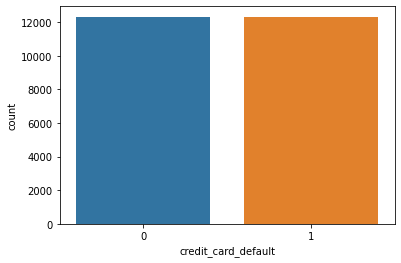

In [77]:
sns.countplot(y_oversample)

In [78]:
# from imblearn.over_sampling import SMOTE
# over = SMOTE(sampling_strategy=0.2)
# X_oversample1, y_oversample1 = over.fit_resample(X_oversample, y_oversample)

<AxesSubplot:xlabel='credit_card_default', ylabel='count'>

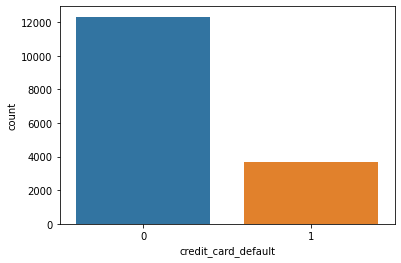

In [72]:
sns.countplot(y_oversample)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.2, random_state=42)

In [80]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.9743589743589743

In [81]:
model = RandomForestClassifier(class_weight='balanced')
# X_copy = X_copy[selected_features]
# X_copy = scaler.fit_transform(X_copy)
model.fit(X_oversample, y_oversample)

RandomForestClassifier(class_weight='balanced')

In [82]:
test.columns

Index(['age', 'gender', 'owns_car', 'owns_house', 'no_of_children',
       'net_yearly_income', 'no_of_days_employed', 'occupation_type',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months'],
      dtype='object')

In [83]:
test_2 = pd.read_csv('test.csv')
customer_id = np.array(test_2.customer_id)

In [84]:
final_predictions = model.predict(test)


rf_submission_smote_undersample = pd.DataFrame({'customer_id': customer_id,
                               'credit_card_default':  final_predictions})
print(rf_submission_smote_undersample.shape)
rf_submission_smote_undersample.to_csv('rf_submission_smote_undersample4.csv', index=False)

(11383, 2)


### Random forest tuning

In [52]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

In [61]:
# model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

model_rf_2 = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')

# model2 = BalancedRandomForestClassifier(n_estimators=10)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [62]:
scores = cross_val_score(model_rf_2, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

In [63]:
print('Mean F1: %.3f' % mean(scores))
model_rf_2.fit(X_train, y_train)

Mean F1: 0.852


RandomForestClassifier(class_weight='balanced_subsample', n_estimators=10)

In [64]:
final_predictions = model_rf_2.predict(test)
test_2 = pd.read_csv('test.csv')

customer_id = np.array(test_2.customer_id)

rf_tuned = pd.DataFrame({'customer_id': customer_id,
                               'credit_card_default':  final_predictions})

rf_tuned.to_csv('rf_tuned_2.csv', index=False)
print(rf_tuned.shape)

(11383, 2)


#### with SMOTE Analysis

In [37]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [39]:
steps = [('over', SMOTE()), ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)

In [40]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

In [41]:
print('Mean F1: %.3f' % np.mean(scores))

Mean F1: 0.818


#### under and over sampling

In [43]:
from imblearn.under_sampling import RandomUnderSampler

In [44]:
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

In [45]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
print('Mean F1: %.3f' % np.mean(scores))

Mean F1: 0.793


#### with k trails

In [47]:
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    model = RandomForestClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
    print("k ", k , 'Mean F1: %.3f' % np.mean(scores))

k  1 Mean F1: 0.795
k  2 Mean F1: 0.793
k  3 Mean F1: 0.795
k  4 Mean F1: 0.792
k  5 Mean F1: 0.793
k  6 Mean F1: 0.794
k  7 Mean F1: 0.793


In [43]:
# Importing the Packages:
import optuna
from sklearn import linear_model
from sklearn import ensemble
from sklearn import model_selection

#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest"])
    cls_weight = (y_train.shape[0] - np.sum(y_train)) / np.sum(y_train)
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'LogReg':
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        classifier_obj = linear_model.LogisticRegression(C=logreg_c, class_weight=cls_weight)
    else:
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=rf_n_estimators, class_weight='balanced')

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, X_train, y_train, scoring='f1', n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2021-12-14 16:35:00,261] A new study created in memory with name: no-name-5b9ba071-b65f-412c-b1ac-c60afc0876c9
[I 2021-12-14 16:35:02,617] Trial 0 finished with value: 0.0 and parameters: {'classifier': 'LogReg', 'logreg_c': 1.1880678208815457e-05}. Best is trial 0 with value: 0.0.
[I 2021-12-14 16:35:04,887] Trial 1 finished with value: 0.8538631355949592 and parameters: {'classifier': 'LogReg', 'logreg_c': 117.54913765701288}. Best is trial 1 with value: 0.8538631355949592.
[I 2021-12-14 16:35:05,910] Trial 2 finished with value: 0.0 and parameters: {'classifier': 'LogReg', 'logreg_c': 2.7610603281475595e-05}. Best is trial 1 with value: 0.8538631355949592.
[I 2021-12-14 16:35:10,878] Trial 3 finished with value: 0.7755337924716971 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 344, 'rf_max_depth': 8}. Best is trial 1 with value: 0.8538631355949592.
[I 2021-12-14 16:35:11,517] Trial 4 finished with value: 0.8542393672882819 and parameters: {'classifier': 'LogReg

[I 2021-12-14 16:36:40,230] Trial 38 finished with value: 0.0 and parameters: {'classifier': 'LogReg', 'logreg_c': 1.062218264603393e-06}. Best is trial 31 with value: 0.860237185141625.
[I 2021-12-14 16:36:40,549] Trial 39 finished with value: 0.8606750211413857 and parameters: {'classifier': 'LogReg', 'logreg_c': 0.0818230773797285}. Best is trial 39 with value: 0.8606750211413857.
[I 2021-12-14 16:36:40,755] Trial 40 finished with value: 0.0 and parameters: {'classifier': 'LogReg', 'logreg_c': 8.731032211319525e-05}. Best is trial 39 with value: 0.8606750211413857.
[I 2021-12-14 16:36:41,048] Trial 41 finished with value: 0.8602311644991154 and parameters: {'classifier': 'LogReg', 'logreg_c': 0.06735577342889712}. Best is trial 39 with value: 0.8606750211413857.
[I 2021-12-14 16:36:41,421] Trial 42 finished with value: 0.8542444110032967 and parameters: {'classifier': 'LogReg', 'logreg_c': 4.499516105130025}. Best is trial 39 with value: 0.8606750211413857.
[I 2021-12-14 16:36:41,76

[I 2021-12-14 16:37:14,428] Trial 77 finished with value: 0.8539182673583685 and parameters: {'classifier': 'LogReg', 'logreg_c': 2.106280394573983}. Best is trial 52 with value: 0.8607553814672283.
[I 2021-12-14 16:37:14,727] Trial 78 finished with value: 0.8603647733060247 and parameters: {'classifier': 'LogReg', 'logreg_c': 0.03777259353052351}. Best is trial 52 with value: 0.8607553814672283.
[I 2021-12-14 16:37:15,014] Trial 79 finished with value: 0.43329797429527234 and parameters: {'classifier': 'LogReg', 'logreg_c': 0.0005357095644841184}. Best is trial 52 with value: 0.8607553814672283.
[I 2021-12-14 16:37:15,402] Trial 80 finished with value: 0.8541200086753505 and parameters: {'classifier': 'LogReg', 'logreg_c': 65.22913960407905}. Best is trial 52 with value: 0.8607553814672283.
[I 2021-12-14 16:37:15,732] Trial 81 finished with value: 0.8598978039591167 and parameters: {'classifier': 'LogReg', 'logreg_c': 0.045129812472731574}. Best is trial 52 with value: 0.8607553814672

In [44]:

# Getting the best trial:
print(f"The best trial is : \n{study.best_trial}")


The best trial is : 
FrozenTrial(number=52, values=[0.8607553814672283], datetime_start=datetime.datetime(2021, 12, 14, 16, 36, 51, 556562), datetime_complete=datetime.datetime(2021, 12, 14, 16, 36, 51, 902146), params={'classifier': 'LogReg', 'logreg_c': 0.04948088676658693}, distributions={'classifier': CategoricalDistribution(choices=('LogReg', 'RandomForest')), 'logreg_c': LogUniformDistribution(high=10000000000.0, low=1e-10)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=52, state=TrialState.COMPLETE, value=None)


In [45]:
# >> Output:
#The best trial is : 
#FrozenTrial(number=18, value=0.9631114824097281, datetime_start=datetime.datetime(2020, 8, 16, 14, 24, 37, 407344), datetime_complete=datetime.datetime(2020, 8, 16, 14, 24, 37, 675114), params={'classifier': 'RandomForest', 'rf_n_estimators': 153, 'rf_max_depth': 21},
#distributions={'classifier': CategoricalDistribution(choices=('LogReg', 'RandomForest')), 'rf_n_estimators': IntUniformDistribution(high=1000, low=10, step=1), 'rf_max_depth': IntLogUniformDistribution(high=32, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=18, state=TrialState.COMPLETE)

# Getting the best score:
print(f"The best value is : \n{study.best_value}")
# >> Output:
# 0.9631114824097281



The best value is : 
0.8607553814672283


In [46]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# >> Output:
# {'classifier': 'RandomForest', 'rf_n_estimators': 153, 'rf_max_depth': 21}

The best parameters are : 
{'classifier': 'LogReg', 'logreg_c': 0.04948088676658693}


In [47]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
#     X, y = make_classification(n_features=10, random_state=1)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    
#     rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
#     rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
#     clf = ensemble.RandomForestClassifier(
#         max_depth=rf_max_depth, n_estimators=rf_n_estimators)

#     clf = RandomForestClassifier(C=C)
    cls_weight = (y_train.shape[0] - np.sum(y_train)) / np.sum(y_train)
    logreg_c = 0.07556138435820774
    clf = linear_model.LogisticRegression(C=logreg_c, class_weight=cls_weight)
    
    clf.fit(X_train, y_train)

    # calculate more evaluation metrics
    pred = clf.predict(X_val)
    rf_optuna = clf.predict(test)

    acc = accuracy_score(pred, y_val)
#     recall = recall_score(pred, y_val)
#     precision = precision_score(pred, y_val)
    f1 = f1_score(pred, y_val)

    return acc, f1, rf_optuna

In [48]:
acc, f1, lr_optuna = detailed_objective(study.best_trial)

acc, f1

(0.9808319467554076, 0.8731277533039649)

In [61]:
submission_sample = pd.read_csv('sample_submission.csv')
test_2 = pd.read_csv('test.csv')

customer_id = np.array(test_2.customer_id)

lr_optuna_tuned = pd.DataFrame({'customer_id': customer_id,
                               'credit_card_default':  lr_optuna})

In [62]:
lr_optuna_tuned.shape

(11383, 2)

In [63]:
lr_optuna_tuned.to_csv('lr_optuna_tuned.csv', index=False)

In [86]:
from sklearn.utils import class_weight

11.485878018829307

#### fit a logistic regression model

In [35]:
# from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 800).fit(X_train, y_train)
logreg_pred = logreg.predict(X_val)

In [36]:
np.unique(logreg_pred, return_counts=True)

(array([0, 1], dtype=int64), array([13962,  1063], dtype=int64))

In [37]:
# from sklearn.metrics import mean_squared_error, f1_score
np.sqrt(mean_squared_error(y_val, logreg_pred))

0.1429426889099683

In [38]:
f1_score(y_val, logreg_pred)

0.8675010789814415

In [39]:
accuracy_score(y_val, logreg_pred)

0.979567387687188

In [40]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

In [41]:
algos = [GaussianNB(),  DecisionTreeClassifier(), RandomForestClassifier()]

names = ['Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier']

rmse_list = []
f1_score_list = []
accuracy_score_list = []

In [42]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    MSE= mean_squared_error(y_val,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    f1_score_list.append(f1_score(y_val, y_pred))
    accuracy_score_list.append(accuracy_score(y_val, y_pred))

In [43]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list,
                            'F1-score': f1_score_list,
                            'accuracy score': accuracy_score_list})
evaluation

,Model,RMSE,F1-score,accuracy score
0,Naive Bayes,0.149764,0.845625,0.977571
1,Decision Tree Classifier,0.168383,0.834756,0.971647
2,Random Forest Classifier,0.139168,0.869915,0.980632


In [46]:
#going with RF
model = RandomForestClassifier()
model.fit(X, y)
final_predictions = model.predict(test)

In [57]:
final_predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [57]:
submission_sample = pd.read_csv('sample_submission.csv')
test_2 = pd.read_csv('test.csv')

In [58]:
customer_id = np.array(test_2.customer_id)

In [60]:
rf_submission = pd.DataFrame({'customer_id': customer_id,
                               'credit_card_default':  final_predictions})

In [63]:
rf_submission.shape

(11383, 2)

In [64]:
rf_submission.to_csv('rf_submission.csv', index=False)

In [36]:
X_train.drop(columns=['customer_id', 'name'], inplace=True)
X_val.drop(columns=['customer_id', 'name'], inplace=True)

c:\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
import timeit
import pickle
import sys
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score
from sklearn.exceptions import NotFittedError

In [46]:
def train_clf(clf, x_train, y_train, sample_weight=None, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(x_train)
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(x_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(x_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(x_train)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    return clf, y_pred_train, train_acc, train_time

In [47]:
def model_memory_size(clf):
    return sys.getsizeof(pickle.dumps(clf))

In [48]:
def feature_importance_plot(importances, feature_labels, ax=None):
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
    sns.barplot(x=importances, y=feature_labels, ax=axis)
    axis.set_title('Feature Importance Measures')
    
    plt.close()
    
    return axis if ax else fig

In [49]:
def precision_recall_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Precision-Recall curve.
        Set `compare=True` to use this function to compare classifiers. """
    
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    
    if compare:
        sns.lineplot(r, p, ax=axis, label=label)
        axis.set_xlabel('Recall')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')
    else:
        sns.lineplot(thresh, p, label='Precision', ax=axis)
        axis.set_xlabel('Threshold')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')

        axis_twin = axis.twinx()
        sns.lineplot(thresh, r, color='limegreen', label='Recall', ax=axis_twin)
        axis_twin.set_ylabel('Recall')
        axis_twin.set_ylim(0, 1)
        axis_twin.legend(bbox_to_anchor=(0.24, 0.18))
    
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    return axis if ax else fig

In [50]:
def roc_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Receiver Operating Characteristic (ROC) curve 
        Set `compare=True` to use this function to compare classifiers. """
    
    fpr, tpr, thresh = roc_curve(y_true, y_probs,
                                 drop_intermediate=False)
    auc = round(roc_auc_score(y_true, y_probs), 2)
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    label = ' '.join([label, f'({auc})']) if compare else None
    sns.lineplot(x=fpr, y=tpr, ax=axis, label=label)
    
    if compare:
        axis.legend(title='Classifier (AUC)', loc='lower right')
    else:
        axis.text(0.72, 0.05, f'AUC = { auc }', fontsize=12,
                  bbox=dict(facecolor='green', alpha=0.4, pad=5))
            
        # Plot No-Info classifier
        axis.fill_between(fpr, fpr, tpr, alpha=0.3, edgecolor='g',
                          linestyle='--', linewidth=2)
        
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('ROC Curve')
    axis.set_xlabel('False Positive Rate [FPR]\n(1 - Specificity)')
    axis.set_ylabel('True Positive Rate [TPR]\n(Sensitivity or Recall)')
    
    plt.close()
    
    return axis if ax else fig

In [51]:
def confusion_plot(matrix, labels=None):
    """ Display binary confusion matrix as a Seaborn heatmap """
    
    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
    plt.close()
    
    return fig

In [40]:
def report(clf, x_train, y_train, x_test, y_test, display_scores=[],
           sample_weight=None, refit=False, importance_plot=False,
           confusion_labels=None, feature_labels=None, verbose=True):
    """ Trains the passed classifier if not already trained and reports
        various metrics of the trained classifier """
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, \
    train_acc, train_time = train_clf(clf, x_train, y_train,
                                      sample_weight=sample_weight,
                                      refit=refit)
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(x_test)
    end = timeit.default_timer()
    test_time = end - start
    
    test_acc = accuracy_score(y_test, test_predictions)
    y_probs = clf.predict_proba(x_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_probs)
        
    ## Additional scores
    scores_dict = dict()
    for func in display_scores:
        scores_dict[func.__name__] = [func(y_train, train_predictions),
                                      func(y_test, test_predictions)]
        
    ## Model Memory
    model_mem = round(model_memory_size(clf) / 1024, 2)
    
    print(clf)
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {x_train.shape[0]} samples")
    print(f" Test Size: {x_test.shape[0]} samples")
    print("---------------------------------------------")
    print(f"Training Time: {round(train_time, 3)} seconds")
    print(f" Testing Time: {round(test_time, 3)} seconds")
    print("---------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("---------------------------------------------")
    
    if display_scores:
        for k, v in scores_dict.items():
            score_name = ' '.join(map(lambda x: x.title(), k.split('_')))
            print(f'Train {score_name}: ', v[0])
            print(f' Test {score_name}: ', v[1])
            print()
        print("---------------------------------------------")
    
    print(" Area Under ROC (test): ", roc_auc)
    print("---------------------------------------------")
    print(f"Model Memory Size: {model_mem} kB")
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))
    
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_plot(confusion_matrix(y_test, test_predictions),
                               labels=confusion_labels))
        print("\n=======================================> PLOTS <=========================================")


        ## Variable importance plot
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        roc_axes = axes[0, 0]
        pr_axes = axes[0, 1]
        importances = None

        if importance_plot:
            if not feature_labels:
                raise RuntimeError("'feature_labels' argument not passed "
                                   "when 'importance_plot' is True")

            try:
                importances = pd.Series(clf.feature_importances_,
                                        index=feature_labels) \
                                .sort_values(ascending=False)
            except AttributeError:
                try:
                    importances = pd.Series(clf.coef_.ravel(),
                                            index=feature_labels) \
                                    .sort_values(ascending=False)
                except AttributeError:
                    pass

            if importances is not None:
                # Modifying grid
                grid_spec = axes[0, 0].get_gridspec()
                for ax in axes[:, 0]:
                    ax.remove()   # remove first column axes
                large_axs = fig.add_subplot(grid_spec[0:, 0])

                # Plot importance curve
                feature_importance_plot(importances=importances.values,
                                        feature_labels=importances.index,
                                        ax=large_axs)
                large_axs.axvline(x=0)

                # Axis for ROC and PR curve
                roc_axes = axes[0, 1]
                pr_axes = axes[1, 1]
            else:
                # remove second row axes
                for ax in axes[1, :]:
                    ax.remove()
        else:
            # remove second row axes
            for ax in axes[1, :]:
                ax.remove()


        ## ROC and Precision-Recall curves
        clf_name = clf.__class__.__name__
        roc_plot(y_test, y_probs, clf_name, ax=roc_axes)
        precision_recall_plot(y_test, y_probs, clf_name, ax=pr_axes)

        fig.subplots_adjust(wspace=5)
        fig.tight_layout()
        display(fig)
    
    ## Dump to report_dict
    dump = dict(clf=clf, accuracy=[train_acc, test_acc], **scores_dict,
                train_time=train_time, train_predictions=train_predictions,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep, roc_auc=roc_auc,
                model_memory=model_mem)
    
    return clf, dump

In [38]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from sklearn import metrics

In [39]:
primary_eval_metric = metrics.f1_score
confusion_lbs = ['not a defaulter', 'defaulter']

## Compute `class_weights` using sklearn
cls_weight = (y_train.shape[0] - np.sum(y_train)) / np.sum(y_train)

[20:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=11.485878018829307,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 30503 samples
 Test Size: 15025 samples
---------------------------------------------
Training Time: 0 seconds
 Testing Time: 0.017 seconds
---------------------------------------------
Train Accuracy:  0.9969839032226339
 Test Accuracy:  0.9687853577371048
-------------------------

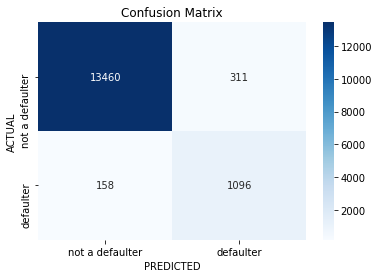


=======================================> PLOTS <=========================================


RuntimeError: 'feature_labels' argument not passed when 'importance_plot' is True

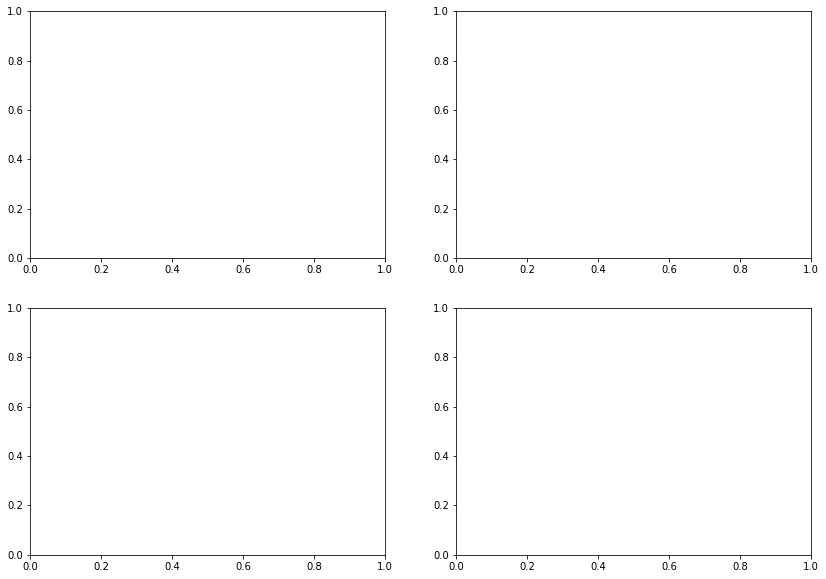

In [52]:
xgb_clf_default = XGBClassifier(scale_pos_weight=cls_weight,
                                random_state=0, n_jobs=-1)
xgb_clf_default.fit(X_train, y_train)

xgb_clf_default, xgb_report_default = report(xgb_clf_default, X_train, y_train,
                                             X_val, y_val,
                                             display_scores=[primary_eval_metric],
                                             importance_plot=True,
                                             confusion_labels=confusion_lbs)

In [ ]:
# test.drop(columns=['customer_id', 'name'], inplace=True)

In [59]:
xgb_default_preds = xgb_clf_default.predict(test)

In [61]:
xgb_def_submission = pd.DataFrame({'customer_id': customer_id,
                               'credit_card_default':  xgb_default_preds})

In [63]:
xgb_def_submission.shape

(11383, 2)

In [64]:
xgb_def_submission.to_csv('xgb_def_submission.csv', index=False)

In [1]:
import imblearn